MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9771147	test: 0.9847534	best: 0.9847534 (0)	total: 85.7ms	remaining: 25.6s
50:	learn: 0.9827238	test: 0.9847534	best: 0.9847534 (0)	total: 3.85s	remaining: 18.8s
100:	learn: 0.9885573	test: 0.9847534	best: 0.9847534 (0)	total: 7.25s	remaining: 14.3s
150:	learn: 0.9948396	test: 0.9856502	best: 0.9856502 (111)	total: 10.4s	remaining: 10.2s
200:	learn: 0.9975320	test: 0.9856502	best: 0.9856502 (111)	total: 13.3s	remaining: 6.56s
250:	learn: 0.9984294	test: 0.9856502	best: 0.9856502 (111)	total: 16.3s	remaining: 3.18s
299:	learn: 0.9984294	test: 0.9856502	best: 0.9856502 (111)	total: 19.3s	remaining: 0us

bestTest = 0.9856502242
bestIteration = 111

Shrink model to first 112 iterations.
Accuracy: 0.9856502242152466

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       966
         1.0       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99 

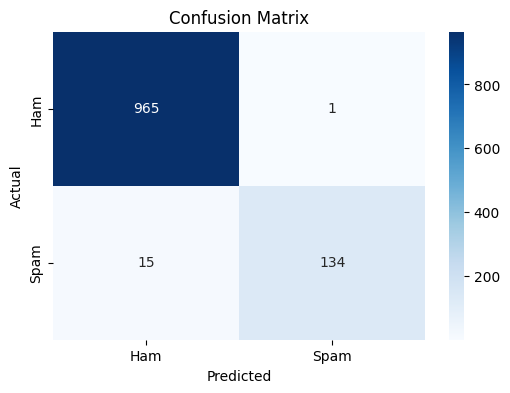

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("email.csv", encoding='latin-1')
data = data[['Category', 'Message']]
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})
data = data.dropna(subset=['Category', 'Message'])

X_train, X_val, y_train, y_val = train_test_split(
    data['Message'], data['Category'], test_size=0.2, random_state=42
)

X_train = X_train.to_frame(name='Message')
X_val = X_val.to_frame(name='Message')

train_pool = Pool(X_train, y_train, text_features=['Message'])
val_pool = Pool(X_val, y_val, text_features=['Message'])

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.2,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=50
)

model.fit(train_pool, eval_set=val_pool, plot=True)
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
